In [4]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core

# Note: This is a faster way to install detectron2 in Colab,
# but it does not include all functionalities (e.g., compilation).
# See https://detectron2.readthedocs.io/tutorials/install.html for full instructions.

!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join("'%s'" % x for x in dist.install_requires)}
sys.path.insert(0, os.path.abspath('./detectron2'))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 19.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15908, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 15908 (delta 72), reused 34 (delta 32), pack-reused 15787 (from 2)
Receiving objects: 100% (15908/15908), 6.46 MiB | 12.71 MiB/s, done.
Resolving deltas: 100% (11571/11571), done.
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your 

In [6]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import numpy as np
import os,json,cv2,random
from google.colab.patches import cv2_imshow
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer # Corrected import
from detectron2.data import MetadataCatalog, DatasetCatalog # Corrected import

In [5]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-pq7l85hq
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-pq7l85hq
  Resolved https://github.com/facebookresearch/detectron2.git to commit d38d7161247e64276d4c44d9d0605291e80bd969
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp311-cp311-linux_x86_64.whl size=6434847 sha256=0f0b7e357940996881ed3586658202f743d1439a785d6a0bf3ec0a693d22a5ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-ga8nj6js/wheels/17/d9/40/60db98e485aa9455d653e29d1046601ce96fe23647f60c1c5a
Successfully built detectron2


In [5]:
import torch,detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:",detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
torch:  2.6 ; cuda:  cu124
detectron2: 0.6


In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LGJUIGJIhJ72Z400eCUQ")
project = rf.workspace("joseph-nelson").project("hard-hat-workers")
version = project.version(14)
dataset = version.download("coco")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 78.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Hard-Hat-Workers-14 in coco:: 100%|██████████| 7043/7043 [00:01<00:00, 5822.69it/s]


In [8]:
from detectron2.data.datasets import register_coco_instances

register_coco_instances("hardhat_train", {}, "Hard-Hat-Workers-14/train/_annotations.coco.json", "Hard-Hat-Workers-14/train")
register_coco_instances("hardhat_val", {}, "Hard-Hat-Workers-14/valid/_annotations.coco.json", "Hard-Hat-Workers-14/valid")
register_coco_instances("hardhat_test", {}, "Hard-Hat-Workers-14/test/_annotations.coco.json", "Hard-Hat-Workers-14/test")


WARNING [08/16 10:01:24 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[08/16 10:01:24 d2.data.datasets.coco]: Loaded 4916 images in COCO format from Hard-Hat-Workers-14/train/_annotations.coco.json


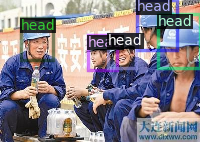

In [9]:
hardhat_metadata = MetadataCatalog.get("hardhat_train")
dataset_dicts = DatasetCatalog.get("hardhat_train")
d = random.choice(dataset_dicts)
img = cv2.imread(d["file_name"])
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
visualizer = Visualizer(img[:, :, ::-1], metadata=hardhat_metadata, scale=0.5)
out = visualizer.draw_dataset_dict(d)
cv2_imshow(out.get_image()[:, :, ::-1])

In [10]:
print(hardhat_metadata)
print(dataset_dicts[0])

Metadata(name='hardhat_train', json_file='Hard-Hat-Workers-14/train/_annotations.coco.json', image_root='Hard-Hat-Workers-14/train', evaluator_type='coco', thing_classes=['Workers', 'head'], thing_dataset_id_to_contiguous_id={0: 0, 1: 1})
{'file_name': 'Hard-Hat-Workers-14/train/002902_jpg.rf.62342a84ac82701162ef857089f2e5bc.jpg', 'height': 300, 'width': 400, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [296, 128, 33, 34], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [166, 95, 34, 47], 'category_id': 1, 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}


In [11]:
import torch
print(torch.cuda.is_available())

True


In [16]:
#training
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("hardhat_train",)
cfg.DATASETS.TEST = ("hardhat_val",) # Added this line to specify the validation dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH =2
cfg.SOLVER.BASE_LR =  0.0025
cfg.SOLVER.MAX_ITER = 300
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2 # Corrected to 2 classes
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[08/16 10:17:24 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[08/16 10:17:24 d2.engine.train_loop]: Starting training from iteration 0
[08/16 10:17:33 d2.utils.events]:  eta: 0:02:07  iter: 19  total_loss: 1.511  loss_cls: 1.053  loss_box_reg: 0.2379  loss_rpn_cls: 0.114  loss_rpn_loc: 0.01918    time: 0.4374  last_time: 0.5309  data_time: 0.0157  last_data_time: 0.0170   lr: 0.00016068  max_mem: 3027M
[08/16 10:17:42 d2.utils.events]:  eta: 0:01:58  iter: 39  total_loss: 1.311  loss_cls: 0.5188  loss_box_reg: 0.7893  loss_rpn_cls: 0.04797  loss_rpn_loc: 0.02474    time: 0.4456  last_time: 0.3415  data_time: 0.0106  last_data_time: 0.0057   lr: 0.00032718  max_mem: 3027M
[08/16 10:17:51 d2.utils.events]:  eta: 0:01:48  iter: 59  total_loss: 1.094  loss_cls: 0.3099  loss_box_reg: 0.8009  loss_rpn_cls: 0.02631  loss_rpn_loc: 0.01837    time: 0.4487  last_time: 0.4394  data_time: 0.0097  last_data_time: 0.0162   lr: 0.00049367  max_mem: 3116M
[08/16 10:18:00 d2.utils.events]:  eta: 0:01:40  iter: 79  total_loss: 0.9108  loss_cls: 0.2122  loss_box_r

In [17]:
from detectron2.evaluation import COCOEvaluator,inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("hardhat_val",output_dir="./output")
val_loader = build_detection_test_loader(cfg,"hardhat_val")
print(inference_on_dataset(trainer.model,val_loader,evaluator))

[08/16 10:19:45 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [08/16 10:19:45 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[08/16 10:19:45 d2.data.datasets.coco]: Loaded 1413 images in COCO format from Hard-Hat-Workers-14/valid/_annotations.coco.json
[08/16 10:19:45 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/16 10:19:45 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[08/16 10:19:45 d2.data.common]: Serializing 1413 elements to byte tensors and concatenating them all ...
[08/16 10:19:45 d2.data.common]: Serialized dataset takes 0.48 MiB
[08/16 10:19:45 d2.evaluation.evaluator]: Start inference on 1413 batches
[08/16 10:19:47 d2.evaluation.evaluator]: Inference done 11/1413. Dataloading

In [19]:
#getting congif  file for model config   in the future
f = open('config.yaml','w')
f.write(cfg.dump())
f.close()

In [58]:
from detectron2.data import MetadataCatalog

In [68]:
custom_metadata = Metadata(name="hardhat_custom",
                           thing_classes=["Helmet", "No Helmet"],
                           thing_colors=[(0, 255, 0), (255, 0, 0)]) # Green, Red


In [69]:
import cv2
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
cfg = get_cfg()
cfg.merge_from_file("config.yaml")
cfg.MODEL.WEIGHTS = "/content/output/model_final.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8  # set threshold for this model

predictor = DefaultPredictor(cfg)
def predict_from_image(img):
  outputs = predictor(img)
  v = Visualizer(img[:,:,::-1],
                 metadata =custom_metadata,
                 scale =1.2,
                 instance_mode= ColorMode.SEGMENTATION)

  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  return outputs,out.get_image()[:,:,::-1]

[08/16 11:20:50 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/output/model_final.pth ...


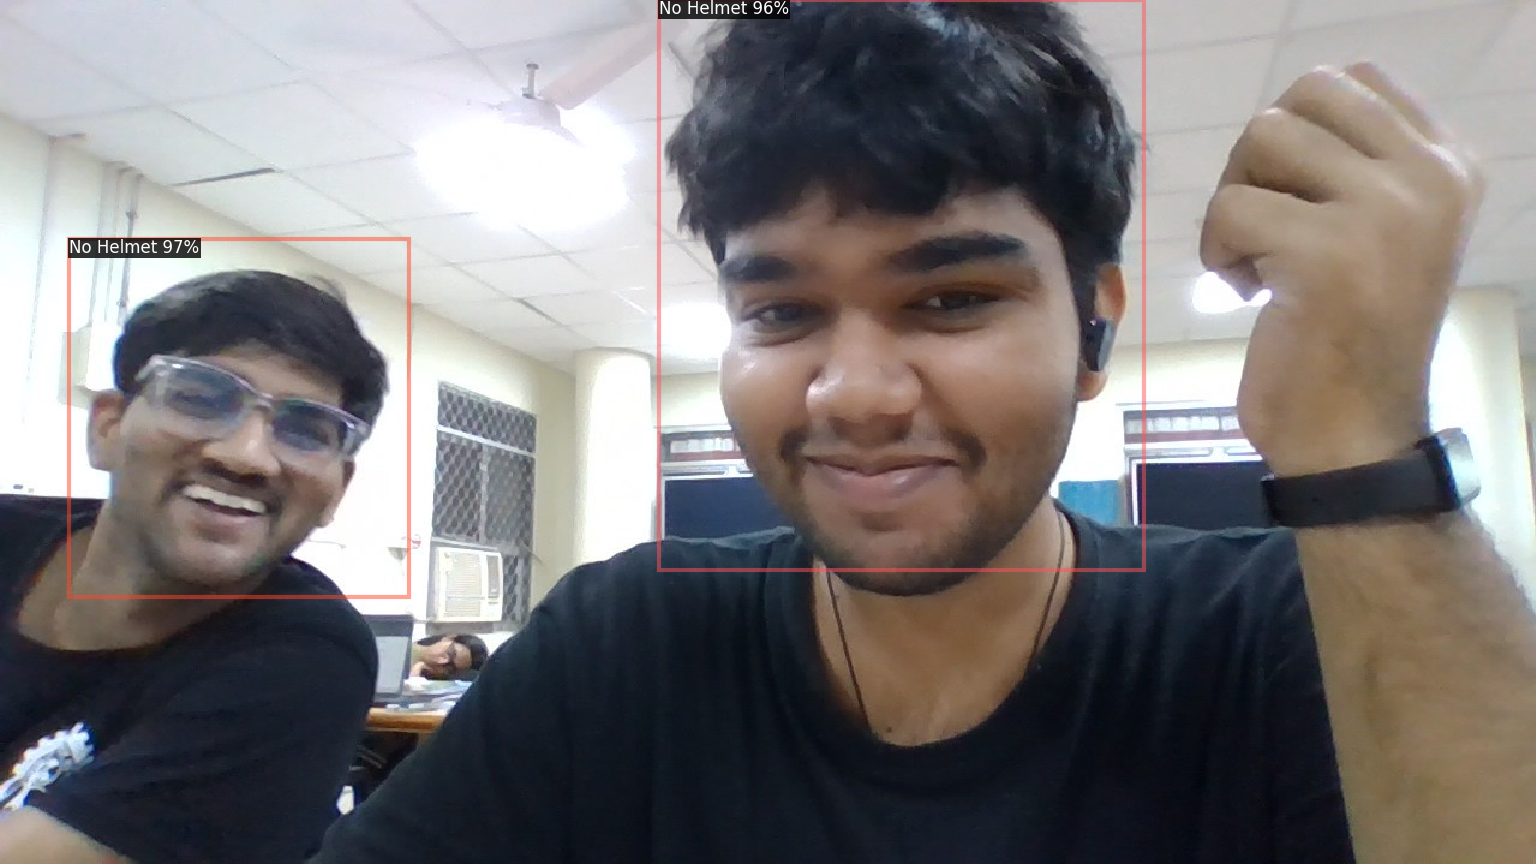

tensor([1, 1], device='cuda:0')
Boxes(tensor([[ 57.8511, 198.8158, 341.1899, 497.7190],
        [549.0843,   0.0000, 953.4752, 475.4154]], device='cuda:0'))
tensor([0.9750, 0.9649], device='cuda:0')


In [70]:
#read a image
img = cv2.imread("/content/WIN_20240915_18_12_39_Pro.jpg")
#get predictions
outputs,vis_img = predict_from_image(img)
#show Predictions
cv2_imshow(vis_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
print(outputs["instances"].pred_classes) # pred_classes
print(outputs["instances"].pred_boxes) # pred_boxes
print(outputs["instances"].scores)  #confidence score

SyntaxError: invalid syntax (ipython-input-1796007711.py, line 2)